In [2]:
import pandas as pd

data = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo/data/raw/HSTMachineError.csv')
data.head(5)

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority
0,11897185,7,2025-01-30 10:22:00.000,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0
1,11897186,21,2025-01-30 10:21:42.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
2,11897187,23,2025-01-30 10:21:56.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0
3,11897188,21,2025-01-30 10:21:56.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
4,11897189,23,2025-01-30 10:21:57.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0


In [3]:
# Create a copy of the data
data_copy = data.copy()

In [4]:
data_filtered = data_copy[(data_copy['MerType'].between(21, 24)) | (data_copy['MerType'] == 8)]
data_filtered['Error/warnings'] = data_filtered['MerType'].astype(str) + '_' + data_filtered['MerNumber'].astype(str) + '_' + data_filtered['MerData2'].astype(str) + '_' + data_filtered['MerData3'].astype(str) 
data_filtered.head(5)

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_42815/1200778792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Error/warnings'] = data_filtered['MerType'].astype(str) + '_' + data_filtered['MerNumber'].astype(str) + '_' + data_filtered['MerData2'].astype(str) + '_' + data_filtered['MerData3'].astype(str)


,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings
1,11897186,21,2025-01-30 10:21:42.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0
2,11897187,23,2025-01-30 10:21:56.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0
3,11897188,21,2025-01-30 10:21:56.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0
4,11897189,23,2025-01-30 10:21:57.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0
5,11897190,21,2025-01-30 10:21:57.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0


In [5]:
data_filtered['MerDate'] = pd.to_datetime(data_filtered['MerDate'])
data_filtered.set_index('MerDate', inplace=True)
aggregated_data = data_filtered.groupby([pd.Grouper(freq='15S'), 'Error/warnings']).size().unstack(fill_value=0)

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_42815/2468120529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MerDate'] = pd.to_datetime(data_filtered['MerDate'])
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_42815/2468120529.py:3: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  aggregated_data = data_filtered.groupby([pd.Grouper(freq='15S'), 'Error/warnings']).size().unstack(fill_value=0)


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Rename 'old_name' to 'new_name'
aggregated_data.rename(columns={'8_1': 'machine stops'}, inplace=True)

aggregated_data.head(10)


Error/warnings,21_100_1.0_0.0,21_100_255.0_0.0,21_100_27.0_0.0,21_100_30.0_0.0,21_100_33.0_0.0,21_100_34.0_0.0,21_100_7.0_0.0,21_101_1.0_0.0,21_101_2.0_0.0,21_101_3.0_0.0,21_102_47.0_0.0,21_102_50.0_0.0,21_105_0.0_0.0,21_110_0.0_0.0,21_120_11.0_0.0,21_12_12.0_0.0,21_140_40.0_0.0,21_143_1.0_0.0,21_144_40.0_0.0,21_147_110.0_0.0,21_147_113.0_0.0,21_147_114.0_0.0,21_147_116.0_0.0,21_147_117.0_0.0,21_147_20.0_0.0,21_14_0.0_0.0,21_160_0.0_0.0,21_162_0.0_0.0,21_163_1.0_0.0,21_181_13.0_105.0,21_181_21.0_102.0,21_181_21.0_105.0,21_183_21.0_101.0,21_184_1.0_0.0,21_184_1.0_12.0,21_185_13.0_157.0,21_191_0.0_0.0,21_192_0.0_0.0,21_194_0.0_0.0,21_196_0.0_0.0,21_197_0.0_0.0,21_197_1.0_0.0,21_197_2.0_0.0,21_200_1.0_0.0,21_200_2.0_0.0,21_201_1.0_100.0,21_21_9.0_0.0,21_23_0.0_0.0,21_261_1.0_0.0,21_33_0.0_0.0,21_34_0.0_0.0,21_35_0.0_0.0,21_37_11.0_21.0,21_37_11.0_23.0,21_37_12.0_21.0,21_37_12.0_23.0,21_37_13.0_21.0,21_37_13.0_23.0,21_37_14.0_21.0,21_37_14.0_23.0,21_401_11.0_0.0,21_40_6.0_0.0,21_410_11.0_0.0,21_411_11.0_0.0,21_412_11.0_0.0,21_413_11.0_0.0,21_414_11.0_0.0,21_415_11.0_0.0,21_420_1.0_11.0,21_420_1.0_12.0,21_420_1.0_13.0,21_420_1.0_16.0,21_420_2.0_11.0,21_420_2.0_12.0,21_420_2.0_13.0,21_420_3.0_11.0,21_420_3.0_12.0,21_420_3.0_13.0,21_430_11.0_0.0,21_430_13.0_0.0,21_430_14.0_0.0,21_430_15.0_0.0,21_430_16.0_0.0,21_440_21.0_34.0,21_440_21.0_36.0,21_440_21.0_38.0,21_450_21.0_34.0,21_450_21.0_35.0,21_450_21.0_36.0,21_450_21.0_38.0,21_450_23.0_51.0,21_450_23.0_52.0,21_450_23.0_53.0,21_452_0.0_0.0,21_456_11.0_0.0,21_460_11.0_0.0,21_460_12.0_0.0,21_460_15.0_0.0,21_460_17.0_0.0,21_460_21.0_31.0,21_460_22.0_41.0,21_460_22.0_42.0,21_462_0.0_0.0,21_470_11.0_0.0,21_470_12.0_0.0,21_470_14.0_0.0,21_470_15.0_0.0,21_480_24.0_41.0,21_480_24.0_42.0,21_483_11.0_22.0,21_483_12.0_31.0,21_483_12.0_33.0,21_483_12.0_38.0,21_511_11.0_0.0,21_68_0.0_0.0,21_69_1.0_0.0,21_83_51.0_0.0,21_90_2.0_0.0,21_96_1.0_11.0,21_96_2.0_0.0,21_96_2.0_13.0,21_96_3.0_0.0,21_96_3.0_12.0,21_96_3.0_13.0,21_99_10.0_0.0,21_99_12.0_0.0,21_99_13.0_0.0,21_99_14.0_0.0,21_99_16.0_0.0,21_99_17.0_0.0,21_99_2.0_0.0,21_99_20.0_0.0,21_99_21.0_0.0,21_99_22.0_0.0,21_99_23.0_0.0,21_99_25.0_0.0,21_99_26.0_0.0,21_99_27.0_0.0,21_99_4.0_0.0,21_99_47.0_0.0,21_99_48.0_0.0,21_99_49.0_0.0,21_99_50.0_0.0,21_99_6.0_0.0,21_99_8.0_0.0,22_106_0.0_0.0,22_106_21.0_0.0,22_107_0.0_0.0,22_108_3.0_0.0,22_109_1.0_0.0,22_109_2.0_0.0,22_110_0.0_0.0,22_111_0.0_0.0,22_114_0.0_0.0,22_115_0.0_0.0,22_117_1.0_0.0,22_119_21.0_31.0,22_119_21.0_32.0,22_119_22.0_31.0,22_119_22.0_32.0,22_119_24.0_31.0,22_119_24.0_32.0,22_119_26.0_31.0,22_119_26.0_32.0,22_120_11.0_0.0,22_123_0.0_0.0,22_124_0.0_0.0,22_127_0.0_0.0,22_13_1.0_0.0,22_13_4.0_0.0,22_142_1.0_0.0,22_146_1.0_0.0,22_172_0.0_0.0,22_173_0.0_0.0,22_182_21.0_101.0,22_220_1.0_0.0,22_220_2.0_0.0,22_221_1.0_10.0,22_221_2.0_100.0,22_221_2.0_103.0,22_221_2.0_11.0,22_405_11.0_0.0,22_41_14.0_0.0,22_41_3.0_0.0,22_41_4.0_0.0,22_421_0.0_0.0,22_451_11.0_0.0,22_451_12.0_0.0,22_453_12.0_0.0,22_454_11.0_0.0,22_455_11.0_0.0,22_458_11.0_0.0,22_458_12.0_0.0,22_458_13.0_0.0,22_461_0.0_0.0,22_481_24.0_42.0,22_490_11.0_0.0,22_490_12.0_0.0,22_490_13.0_0.0,22_57_0.0_0.0,22_5_1.0_0.0,22_71_0.0_0.0,22_72_0.0_0.0,22_77_0.0_0.0,22_85_1.0_21.0,22_85_1.0_22.0,22_87_1.0_0.0,22_87_5.0_0.0,22_92_0.0_0.0,22_98_0.0_0.0,23_100_0.0_0.0,23_101_0.0_0.0,23_102_0.0_0.0,23_104_0.0_0.0,23_105_0.0_0.0,23_106_0.0_0.0,23_107_0.0_0.0,23_108_0.0_0.0,23_109_0.0_0.0,23_110_0.0_0.0,23_111_0.0_0.0,23_114_0.0_0.0,23_115_0.0_0.0,23_117_0.0_0.0,23_119_0.0_0.0,23_120_0.0_0.0,23_123_0.0_0.0,23_124_0.0_0.0,23_127_0.0_0.0,23_12_0.0_0.0,23_13_0.0_0.0,23_140_0.0_0.0,23_142_0.0_0.0,23_143_0.0_0.0,23_144_0.0_0.0,23_146_0.0_0.0,23_147_0.0_0.0,23_14_0.0_0.0,23_162_0.0_0.0,23_163_0.0_0.0,23_172_0.0_0.0,23_173_0.0_0.0,23_181_0.0_0.0,23_182_0.0_0.0,23_183_0.0_0.0,23_184_0.0_0.0,23_185_0.0_0.0,23_191_0.0_0.0,23_192_0.0_0.0,23_194_0.0_0.0,23_196_0.0_0.0,23_197_0.0_0.0,23_198_0.0_0.0,23_200_0.0_0.0,23_201_0.0_0.0,23_21_0.0_0.0,23_220_0.0_0.0,23_22

In [7]:

# Assuming you already have your DataFrame loaded as aggregated_data
column_sums = aggregated_data.sum()

# Display the result
column_sums.sort_values(ascending=False)


Error/warnings
23_98_0.0_0.0        525026
22_98_0.0_0.0        524455
23_490_0.0_0.0        76955
23_458_0.0_0.0        65945
22_458_13.0_0.0       57559
22_490_12.0_0.0       50604
22_490_11.0_0.0       34067
23_96_0.0_0.0         29823
21_411_11.0_0.0       28625
22_453_12.0_0.0       25898
23_453_0.0_0.0        24816
21_414_11.0_0.0       21847
23_414_0.0_0.0        21440
23_411_0.0_0.0        20336
21_96_2.0_13.0        17267
21_456_11.0_0.0       14818
23_460_0.0_0.0        14464
21_452_0.0_0.0        14424
21_401_11.0_0.0       14203
23_456_0.0_0.0        13630
23_452_0.0_0.0        13181
22_461_0.0_0.0        11497
23_461_0.0_0.0        11295
21_460_22.0_41.0       8501
24_0_0.0_0.0           7069
22_458_12.0_0.0        6257
21_412_11.0_0.0        6021
21_460_17.0_0.0        5868
21_410_11.0_0.0        5769
23_412_0.0_0.0         5665
21_470_14.0_0.0        5648
8_1_96.0_18.0          5107
8_0_96.0_18.0          5107
21_415_11.0_0.0        4974
23_127_0.0_0.0         4680
23_47

- 490 pack final processing warning (an error occured at the end of line automation)
> meest voorkomend zijn case packer inhibit en take away conveyor full
- 98 rerouting activated for eject station (number of eggs at eject station has reached the maximum. The grader has stopped sending more eggs to this station/lane)
- 458 missing egg detected 
> meest voorkomend is Not stopped due to a setting
- 96 pressure control activated for eject station (number of eggs at eject station has reached the maximum. The grader needs to STOP to prevent cracking)
> meest voorkomend is egg buffer full lane 13
- 411 general safety failure error
> 
- 453 missing eggs warning (can be one or more in a pack)
- 414 cascade front door opened error (a safety switch is triggered) 
- 460 denester error



In [8]:
data_filtered['lane_stopping_machine'] = data_filtered.apply(lambda row: row['MerData3'] if row['MerNumber'] == 96 else pd.NA, axis=1)
data_filtered['lane_stopping_machine'].value_counts()


/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_42815/3648751589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['lane_stopping_machine'] = data_filtered.apply(lambda row: row['MerData3'] if row['MerNumber'] == 96 else pd.NA, axis=1)


lane_stopping_machine
0.0     33829
13.0    21885
11.0     3876
12.0       61
Name: count, dtype: int64

- We want to see the duration of uptime of the machine. So that we can compare these as snapshots with eachother.
- There is every time another lane that caused the machine to stop

In [9]:

def stop_snapshots(df):
    # Startwaarde voor snapshot
    df['snapshot'] = 1
    current_snapshot = 1

    # Itereer over de rijen
    for index, row in df.iterrows():
        if row['MerType'] == 8 and row['MerNumber'] == 0:
            current_snapshot += 1
        df.at[index, 'snapshot'] = current_snapshot
    
    return df

stop_snapshots(data_filtered)

data_filtered.head(5)


/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_42815/2355903029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snapshot'] = 1


,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot
MerDate,,,,,,,,,,,,,,,,,
2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,<NA>,1
2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,<NA>,1
2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,<NA>,1
2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,<NA>,1
2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,<NA>,1


In [13]:
data_filtered = data_filtered.reset_index()
# data_filtered['MerDate'].dt.date.nunique()

In [15]:
data_filtered.to_csv('data_snapshots.csv', index=False, header=True)

In [11]:
display(data_filtered['MerDate'].min()), display(data_filtered['MerDate'].max()) 

Timestamp('2025-01-30 10:21:42')

Timestamp('2025-04-08 21:08:01')

(None, None)

In [3]:
snapshots = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/data_snapshots.csv')
snapshots.head(5)

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02


In [10]:
snapshots['MerDate'] = pd.to_datetime(snapshots['MerDate'])

In [23]:
snapshots['time_delta'] = snapshots.groupby('snapshot')['MerDate'].transform(lambda x: x.max() - x.min())
snapshots.head(2)

In [13]:
snapshots.set_index('MerDate', inplace=True)

In [29]:
# Initialize variables
uptime_windows = []
start_idx = None

# Convert index to list for position-based access
index_list = list(snapshots.index)

# Iterate through the DataFrame to identify uptime windows
for i, (index, row) in enumerate(snapshots.iterrows()):
    if row['MerType'] == 8 and row['MerNumber'] == 1:
        start_idx = i
    elif row['MerType'] == 8 and row['MerNumber'] == 0 and start_idx is not None:
        start_time = index_list[start_idx]
        stop_time = index
        duration = stop_time - start_time

        # Use iloc for slicing by position
        lane_errors = snapshots.iloc[start_idx:i+1]
        lane_errors_count = lane_errors[lane_errors['MerType'] == 21].shape[0]

        uptime_windows.append({
            'Start': start_time, 
            'Stop': stop_time,
            'Uptime': duration,
            'Lane Errors': lane_errors_count
        })

        start_idx = None

In [ ]:
# Initialize variables
uptime_windows = []
start_time = None

# Iterate through the DataFrame to identify uptime windows
for index, row in snapshots.iterrows():
    if row['MerType'] == 8 and row['MerNumber'] == 1:
        start_time = index
    elif row['MerType'] == 8 and row['MerNumber'] == 0 and start_time is not None:
        duration = index - start_time
        lane_errors = snapshots.loc[start_time:index]
        lane_errors_count = lane_errors[lane_errors['MerType'] == 21].shape[0]
        uptime_windows.append({
            'Start': start_time, 
            'Stop' : index,
            'Uptime' : duration,
            'Lane Errors': lane_errors_count
        })
        
        start_time = None

In [30]:
df = pd.DataFrame(uptime_windows)
display(df)

,Start,Stop,Uptime,Lane Errors
0,2025-01-30 10:25:48,2025-01-30 10:31:04,0 days 00:05:16,16
1,2025-01-30 10:31:10,2025-01-30 10:31:15,0 days 00:00:05,3
2,2025-01-30 10:31:17,2025-01-30 10:44:54,0 days 00:13:37,59
3,2025-01-30 10:45:52,2025-01-30 10:46:11,0 days 00:00:19,5
4,2025-01-30 10:46:59,2025-01-30 10:52:47,0 days 00:05:48,13
...,...,...,...,...
24076,2025-04-08 20:06:19,2025-04-08 20:06:22,0 days 00:00:03,1
24077,2025-04-08 20:06:26,2025-04-08 20:06:32,0 days 00:00:06,1
24078,2025-04-08 20:06:34,2025-04-08 20:06:50,0 days 00:00:16,1
24079,2025-04-08 20:06:55,2025-04-08 20:07:30,0 days 00:00:35,1


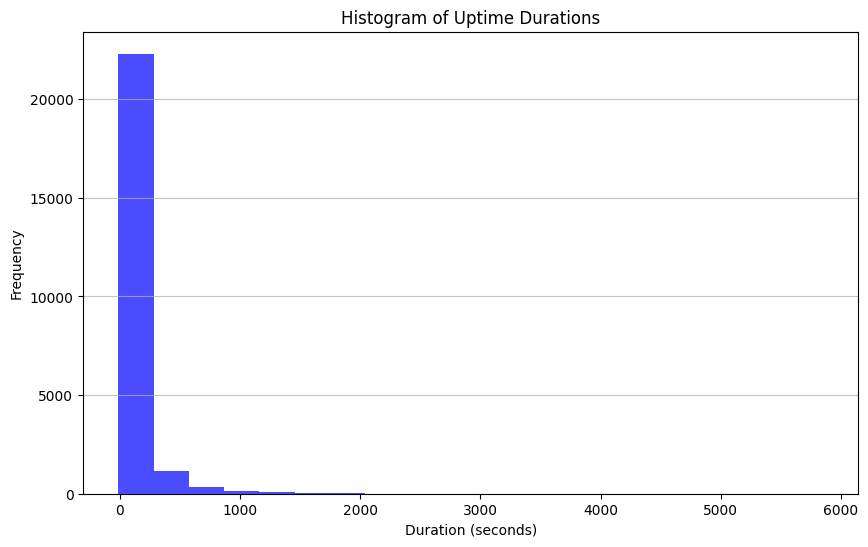

In [21]:
import matplotlib.pyplot as plt

# Convert durations to seconds for better visualization
df['Duration_seconds'] = df['Duration'].dt.total_seconds()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Duration_seconds'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Uptime Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()